<a href="https://colab.research.google.com/github/mykolesiko/eeg_investigation/blob/diplom/MADE_baseline_report_noneutral_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
os.chdir("/content/drive/MyDrive/katya")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pickle
x = pickle.load(open('./data/data_preprocessed_python/s01.dat', 'rb'), encoding='latin1')

In [9]:
data = x['data']
labels = x['labels']

The logarithms of the spectral power from
theta (4-8 Hz), slow alpha (8-10 Hz), alpha (8-12 Hz), beta
(12-30Hz) and gamma (30+ Hz) bands were extracted
from all 32 electrodes as features. In addition to power
spectral features the difference between the spectral
power of all the symmetrical pairs of electrodes on
the right and left hemisphere was extracted to measure
the possible asymmetry in the brain activities due to
emotional stimuli. 

Пары симметричных каналов слева-справа и спереди-сзади

In [10]:
import scipy
from  scipy import signal
freq, power = signal.welch(data[0][0], fs=128.0, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
freq_ranges = [range(4,9), range(8,11), range(8,13), range(12, 31), range(30,48)]
pairs_canals = [[1, 17], [2, 18], [3, 20], [4, 21], [5, 22], [6, 23], [7, 25], [8, 26], [9, 27], [10, 28], [11, 29], [12, 30], [13, 31], [14, 32]]
#FC5-CP5, FC1-CP1, FC2-CP2, FC6-CP6, F7-P7, F3-P3, Fz-Pz,F4-P4, F8-P8, Fp1-O1, Fp2-O2
pairs_canals_1 = [[6, 21], [5, 9], [26, 30], [21, 25], [3, 11], [4, 12], [31, 32], [27, 19], [28, 20], [1, 15], [30, 17] ]
import numpy as np
import scipy
from scipy import stats
freq_resolution = max(freq)/(len(freq) - 1)
max_freq = 128
NVIDEOS = 40
NCANALS = 32

In [11]:
print(freq)
print(freq_resolution)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.  55.5
 56.  56.5 57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  61.5 62.  62.5
 63.  63.5 64. ]
0.5


Считываем данные


In [14]:
import glob
data = []
labels = []
data_dir = './data/data_preprocessed_python'
files = glob.glob(os.path.join(data_dir, "*.dat"))

for file_data in files:
    raw_data = pickle.load(open(file_data, 'rb'), encoding='latin1')
    data.append(raw_data['data'])
    labels.append(raw_data['labels'])

Выделяем нейтральные эмоции в отдельный класс (0, 1, 2)

In [46]:
from collections import Counter
labels_3 = []
num_11 = 0
num_12 = 0
num_21 = 0
num_22 = 0
num_10 = 0
num_20 = 0
for i in range(32):
  neg = labels[i] < 3.5
  pos = labels[i] >= 5.5
  temp = np.zeros_like(labels[i], np.int8)
  temp[neg] = 1
  temp[pos] = 2
  #print(labels[i])
  #print(temp)
  labels_3.append(temp)
  cnt1 = Counter()
  cnt1.update(temp[:, 0])
  cnt2 = Counter()
  cnt2.update(temp[:, 1])
  print(cnt1, cnt2)
  num_11 += cnt1[1]
  num_12 += cnt1[2]
  num_10 += cnt1[0]
  num_21 += cnt2[1]
  num_22 += cnt2[2]
  num_20 += cnt2[0]
 
  #break
  #print(temp)
num1 = num_11 + num_12
num2 = num_21 + num_22   
print(num_11/num1, num_12/num1, num_10,num_21/num2, num_22/num2, num_20)   
labels_all_3 = np.vstack(labels_3)  

Counter({2: 18, 1: 16, 0: 6}) Counter({2: 24, 1: 11, 0: 5})
Counter({2: 22, 0: 10, 1: 8}) Counter({0: 17, 2: 16, 1: 7})
Counter({2: 26, 0: 12, 1: 2}) Counter({0: 17, 2: 14, 1: 9})
Counter({2: 25, 1: 9, 0: 6}) Counter({2: 22, 1: 10, 0: 8})
Counter({0: 20, 2: 15, 1: 5}) Counter({2: 18, 0: 18, 1: 4})
Counter({0: 19, 2: 13, 1: 8}) Counter({0: 20, 2: 20})
Counter({2: 18, 0: 13, 1: 9}) Counter({2: 17, 0: 14, 1: 9})
Counter({2: 19, 0: 12, 1: 9}) Counter({1: 19, 2: 12, 0: 9})
Counter({2: 17, 1: 15, 0: 8}) Counter({2: 26, 0: 9, 1: 5})
Counter({0: 15, 2: 13, 1: 12}) Counter({2: 32, 0: 5, 1: 3})
Counter({2: 20, 1: 16, 0: 4}) Counter({2: 27, 1: 11, 0: 2})
Counter({2: 17, 0: 13, 1: 10}) Counter({0: 22, 2: 10, 1: 8})
Counter({0: 15, 1: 13, 2: 12}) Counter({2: 17, 0: 13, 1: 10})
Counter({2: 21, 0: 15, 1: 4}) Counter({2: 24, 0: 12, 1: 4})
Counter({2: 21, 0: 17, 1: 2}) Counter({2: 22, 0: 15, 1: 3})
Counter({2: 19, 0: 11, 1: 10}) Counter({2: 25, 0: 8, 1: 7})
Counter({2: 17, 0: 16, 1: 7}) Counter({2: 21,

а тут только два класса


In [40]:
from collections import Counter
labels_3 = []
num_11 = 0
num_12 = 0
num_21 = 0
num_22 = 0


for i in range(32):
  neg = labels[i] < 4.5
  pos = labels[i] >= 4.5
  temp = np.zeros_like(labels[i], np.int8)
  temp[neg] = 1
  temp[pos] = 2
  #print(labels[i])
  #print(temp)
  labels_3.append(temp)
  cnt1 = Counter()
  cnt1.update(temp[:, 0])
  cnt2 = Counter()
  cnt2.update(temp[:, 1])
  print(cnt1, cnt2)
  num_11 += cnt1[1]
  num_12 += cnt1[2]
  num_21 += cnt2[1]
  num_22 += cnt2[2]
  #break
  #print(temp)
num1 = num_11 + num_12
num2 = num_21 + num_22   
print(num_11/num1, num_12/num1,num_21/num2, num_22/num2)   
labels_all_3 = np.vstack(labels_3)  

Counter({2: 20, 1: 20}) Counter({2: 25, 1: 15})
Counter({2: 28, 1: 12}) Counter({2: 25, 1: 15})
Counter({2: 33, 1: 7}) Counter({2: 21, 1: 19})
Counter({2: 30, 1: 10}) Counter({2: 25, 1: 15})
Counter({2: 26, 1: 14}) Counter({2: 31, 1: 9})
Counter({2: 23, 1: 17}) Counter({2: 29, 1: 11})
Counter({2: 24, 1: 16}) Counter({2: 23, 1: 17})
Counter({2: 27, 1: 13}) Counter({1: 22, 2: 18})
Counter({2: 23, 1: 17}) Counter({2: 35, 1: 5})
Counter({2: 20, 1: 20}) Counter({2: 35, 1: 5})
Counter({2: 20, 1: 20}) Counter({2: 27, 1: 13})
Counter({2: 22, 1: 18}) Counter({2: 22, 1: 18})
Counter({1: 23, 2: 17}) Counter({2: 20, 1: 20})
Counter({2: 26, 1: 14}) Counter({2: 26, 1: 14})
Counter({2: 30, 1: 10}) Counter({2: 27, 1: 13})
Counter({2: 26, 1: 14}) Counter({2: 28, 1: 12})
Counter({2: 28, 1: 12}) Counter({2: 34, 1: 6})
Counter({2: 25, 1: 15}) Counter({2: 32, 1: 8})
Counter({2: 22, 1: 18}) Counter({2: 29, 1: 11})
Counter({2: 32, 1: 8}) Counter({1: 24, 2: 16})
Counter({1: 21, 2: 19}) Counter({2: 35, 1: 5})


In [18]:
import numpy as np
import scipy
from scipy import stats
freq_resolution = max(freq)/(len(freq) - 1)
from scipy.integrate import simps
max_freq = 128
NVIDEOS = 40
NCANALS = 32
features = ['DE', 'DASM', 'RASM', 'DCAU', 'alpha/beta', 'alpha/(beta + teta)']
def get_features_whole2(data, labels, freq_resolution, max_freq, feature_list):
  data_for_videos = []
  for id in range(NVIDEOS):
    data_for_one_video = []
    powers = np.zeros((NCANALS, 5))
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        for k, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = range(int(interval[0]/freq_resolution), int((interval[-1] + 1)/freq_resolution +1))#(ar / freq_resolution).astype(int)
            #print(ar)
            power_range = power[ar]
            mean_power = simps(power[ar], dx = 0.5)#(power_range).sum()/len(power_range)
            if 'DE' in feature_list:
                data_for_one_video.extend([np.log(mean_power)])
            powers_temp.append(mean_power)
            powers[i, k] = mean_power
        # if 'feature1' in feature_list:
        #            data_for_one_video.extend([np.log(powers[2])/np.log(powers[3])])
        # if 'feature2' in feature_list:
        #            data_for_one_video.extend([np.log(powers[2])/np.log(powers[3]) + np.log(powers[0])])          
        if 'alpha/beta' in feature_list:
                    data_for_one_video.extend([(powers[i, 2])/(powers[i, 3])])
        if 'alpha/(beta + teta)' in feature_list:
                    data_for_one_video.extend([(powers[i, 2])/(powers[i, 3]) + (powers[i, 0])])        
            
    for pair in pairs_canals:
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = np.log(powers[canal_1]) -  np.log(powers[canal_2]) 
        #print(temp)
        if 'DASM' in feature_list:
             data_for_one_video.extend(temp[[0, 1, 2, 3, 4]].tolist())  

        temp = np.log(powers[canal_1])/np.log(powers[canal_2])
        #print(temp)
        if 'RASM' in feature_list:
            data_for_one_video.extend(temp[[0, 1, 2, 3, 4]].tolist())       
        #data_for_one_video.append(one_canal)    

    for pair in pairs_canals_1:
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp =  np.log(powers[canal_1]) -   np.log(powers[canal_2])
        #print(temp)
        if 'DCAU' in feature_list:
            data_for_one_video.extend(temp[[0, 1, 2, 3, 4]].tolist())  

        #temp = powers[canal_1]/powers[canal_2]
        #print(temp)
        #data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())           
    #for s in range(5 * NCANALS):
    #  data_for_one_video[s] = np.log(data_for_one_video[s])

    temp = np.asarray(data_for_one_video)
    #temp[0:160] = stats.zscore(temp[0:160])
    #temp[160:] = stats.zscore(temp[160:])
    data_for_videos.append(temp.copy())    
  result = np.asarray(data_for_videos)   
    #result = stats.zscore(result)
    #result[0:160] = stats.zscore(result[0:160])
    #result[160:] = stats.zscore(result[160:])
  #print(result.shape)
  return result#np.asarray(data_for_videos)     



In [ ]:
data_for_videos = []
for i in  range(len(data)):
    data_for_videos.append(get_features_whole2(data[i], labels[i], freq_resolution, max_freq, ['DE']))

In [ ]:
print(len(data_for_videos))

32


In [39]:
import pandas as pd
emotion = ['valence', 'arousal', 'dominance', 'like']
f1_data_sum = pd.DataFrame(columns = features, index = emotion)
acc_data_sum = pd.DataFrame(columns = features, index = emotion)


In [54]:
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import  GaussianNB
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler 
import pandas as pd
from sklearn import svm
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
#threshold = 0.5
k = 5
labels_common = []

def get_metrics(features):
    result_f1 = []
    result_acc = []
    data_for_videos = []
    for i in  range(len(data)):
            data_for_videos.append(get_features_whole2(data[i], labels[i], freq_resolution, max_freq, features ))
    for i_em in range(4):
        print(i_em)
        f1_all = []
        acc_all = []
        train_indexes = []
        test_indexes = []
        for j in range(32):
                # labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
            train_indexes.append([])    
            test_indexes.append([])    
            #X = np.arange(40)
            y = np.array(labels_3[j][:, i_em])
            y = y[y!=0]
            #print(y)
            X = np.arange(len(y))
            
            if len(y) != 0 :
                skf = StratifiedKFold(n_splits=k, random_state=2021, shuffle=True)
                #kf = KFold(n_splits=k, random_state=None, shuffle=True)
                for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
                #for fold, (train_index, test_index) in enumerate(kf.split(X)):
                    train_indexes[-1].append(train_index)
                    test_indexes[-1].append(test_index)
            else:
               for fold in range(k):
                  train_indexes[-1].append([])
                  test_indexes[-1].append([])      
        
        f1_data = pd.DataFrame(columns = range(k), index = range(32))
        acc_data = pd.DataFrame(columns = range(k), index = range(32))

        for fold in range(k):
            print(fold)
            f1_sub = []
            acc_sub = []

            data_train = []
            data_test = []
            labels_train = []
            labels_test = []
            labels_check = []
            for i in range(32):
             
                  #print( labels_subject_train[i])
               ltemp = labels_3[i][:, i_em]

                  #print(ltemp)
               ltemp1 = ltemp[ltemp != 0]
               if len(ltemp1) != 0:   
                  data_temp = data_for_videos[i][ltemp != 0 ]
                  #print(ltemp1)
                  #print(data_temp.shape)
                  data_subject_train = data_temp[train_indexes[i][fold]]
                  labels_subject_train = ltemp1[train_indexes[i][fold]]
                  #print( labels_subject_train)


                  #if len(labels_subject_train[labels_subject_train == 1]) != 0 and  len(labels_subject_train[labels_subject_train == 2]) != 0:
                  #    ros = RandomOverSampler(random_state=42)
                  #    data_subject_train, labels_subject_train = ros.fit_resample(data_subject_train, labels_subject_train)

                  data_train.append(data_subject_train)
                  labels_train.extend(labels_subject_train)

                  data_subject_test = data_temp[test_indexes[i][fold]]
                  labels_subject_test = ltemp1[test_indexes[i][fold]]
                  #if len(labels_subject_test[labels_subject_test == 1]) != 0 and  len(labels_subject_test[labels_subject_test == 2]) != 0:
                  #    ros = RandomOverSampler(random_state=42)
                  #    data_subject_test, labels_subject_test = ros.fit_resample(data_subject_test, labels_subject_test)

                  data_test.append(data_subject_test)
                  labels_test.extend(labels_subject_test)
                  labels_check.append(labels_subject_test)

            data_train_all = np.vstack(data_train)
            data_test_all = np.vstack(data_test)   
            data_all = np.vstack((data_train_all, data_test_all))
            labels_all = np.hstack((labels_train, labels_test))
            #print(len(labels_train))
            #print(data_train_all.shape)

            #model = lgbm.sklearn.LGBMClassifier(n_estimators = 100, class_weight = 'balanced')#!!!!!!!
            model = RandomForestClassifier(n_estimators = 100, max_features=50,   class_weight = 'balanced')
            model.fit(data_train_all, labels_train)
            cnt_train = Counter()
            cnt_train.update(labels_train)
            #print(labels_train)
            #print(cnt_train)
            cnt_test = Counter()
            cnt_test.update(labels_test)
            #print(labels_train)
            #print(cnt_test)

            labels_predicted = model.predict(data_test_all)
            f1_all.append(f1_score(labels_predicted, labels_test, average = 'macro'))
            acc_all.append(accuracy_score(labels_predicted, labels_test)) 
            f1_sub = []
            acc_sub = []
            for i in range(32):
                 if len(labels_check[i]) != 0:
                     #labels_predicted_sub = [2] * len(data_test[i]) # model.predict(data_test[i])
                     #print(labels_predicted_sub)
                     labels_predicted_sub = model.predict(data_test[i])
                     f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_check[i], average = 'macro'))
                     acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_check[i]))  
                 else:
                     print("!!!!!!")
                     f1_data.loc[i, fold] = 0.5#(f1_score(labels_predicted_sub, labels_check[i], average = 'macro'))
                     acc_data.loc[i, fold] = 0.5# (accuracy_score(labels_predicted_sub, labels_check[i]))  


                 #print(confusion_matrix(labels_predicted_sub, labels_check[i]))
            #break     
        
        print(np.mean(f1_data.values.mean(axis = 1)))
        print(np.mean(acc_data.values.mean(axis = 1)))

        print("*************************")
        print(f1_all)
        print(acc_all)
        print(np.mean(f1_all))    
        print(np.mean(acc_all)) 
        result_f1.append(np.mean(f1_data.values.mean(axis = 1))) 
        result_acc.append(np.mean(acc_data.values.mean(axis = 1)))
        print  
    return result_f1, result_acc, f1_data, acc_data        
                     
       

In [ ]:
#result_f1, result_acc = get_metrics(['DE'])

In [22]:
f1_data_sum['DE'] = result_f1
print(f1_data_sum)

NameError: ignored

In [ ]:
acc_data_sum['DE'] = result_acc
print(acc_data_sum)

                 DE DASM RASM DCAU feature1 feature2
valence    0.668750  NaN  NaN  NaN      NaN      NaN
arousal    0.630469  NaN  NaN  NaN      NaN      NaN
dominance  0.681250  NaN  NaN  NaN      NaN      NaN
like       0.653125  NaN  NaN  NaN      NaN      NaN


In [ ]:
result_f1, result_acc = get_metrics(['DASM'])
f1_data_sum['DASM'] = result_f1
acc_data_sum['DASM'] = result_acc
print(acc_data_sum)
print(f1_data_sum)
result_f1, result_acc = get_metrics(['RASM'])
f1_data_sum['RASM'] = result_f1
acc_data_sum['RASM'] = result_acc
print(acc_data_sum)
print(f1_data_sum)
result_f1, result_acc = get_metrics(['DCAU'])
f1_data_sum['DCAU'] = result_f1
acc_data_sum['DCAU'] = result_acc
print(acc_data_sum)
print(f1_data_sum)

In [ ]:
result_f1, result_acc = get_metrics(['alpha/beta'])
f1_data_sum['alpha/beta'] = result_f1
acc_data_sum['alpha/beta'] = result_acc
print(acc_data_sum)
print(f1_data_sum)
result_f1, result_acc = get_metrics(['alpha/(beta + teta)'])
f1_data_sum['alpha/(beta + teta)'] = result_f1
acc_data_sum['alpha/(beta + teta)'] = result_acc
print(acc_data_sum)
print(f1_data_sum)

In [55]:

result_f1, result_acc, f1_sum, acc_sum = get_metrics(['DE', 'DASM', 'RASM', 'DCAU'])
f1_data_sum['ALL4'] = result_f1
acc_data_sum['ALL4'] = result_acc
print(acc_data_sum)
print(f1_data_sum)

0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.6288419913419914
0.7497991071428574
*************************
[0.7103632779498733, 0.7066043683019987, 0.686104218362283, 0.6752136752136753, 0.6429859358095925]
[0.7647058823529411, 0.7663043478260869, 0.7386363636363636, 0.7192982456140351, 0.7090909090909091]
0.6842542951274846
0.7396071497040672
1
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

1
2
3
4
0.5736694208569209
0.7455133928571428
*************************
[0.7177919969439404, 0.6782190132370638, 0.7048139657908659, 0.6531007751937985, 0.6494427558257345]
[0.7715736040609137, 0.743455497382199, 0.7580645161290323, 0.7206703910614525, 0.7225433526011561]
0.6806737013982805
0.7432614722469507
2
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


1
2
3
4
0.62769399003774
0.7462574404761907
*************************
[0.7173039726231216, 0.6329365079365079, 0.6684775898259044, 0.6363228882278635, 0.6821236559139785]
[0.7894736842105263, 0.7297297297297297, 0.7486033519553073, 0.7085714285714285, 0.7441860465116279]
0.6674329229054752
0.744112848195724
3
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


1
2
3
4
0.5879183836996336
0.7549107142857144
*************************
[0.636073423782921, 0.592581860330339, 0.6123434948285247, 0.6606831395348838, 0.5619496855345911]
[0.7543859649122807, 0.7432432432432432, 0.7440758293838863, 0.7733990147783252, 0.7185929648241206]
0.612726320802252
0.7467394034283712
            DE DASM RASM DCAU alpha/beta alpha/(beta + teta)      ALL4
valence    NaN  NaN  NaN  NaN        NaN                 NaN  0.749799
arousal    NaN  NaN  NaN  NaN        NaN                 NaN  0.745513
dominance  NaN  NaN  NaN  NaN        NaN                 NaN  0.746257
like       NaN  NaN  NaN  NaN        NaN                 NaN  0.754911
            DE DASM RASM DCAU alpha/beta alpha/(beta + teta)      ALL4
valence    NaN  NaN  NaN  NaN        NaN                 NaN  0.628842
arousal    NaN  NaN  NaN  NaN        NaN                 NaN  0.573669
dominance  NaN  NaN  NaN  NaN        NaN                 NaN  0.627694
like       NaN  NaN  NaN  NaN        NaN            

In [ ]:
acc_data_sum = np.mean(acc_data_sum, axis = 1)
f1_data_sum = np.mean(f1_data_sum, axis = 1)
print(acc_data_sum)
print(f1_data_sum)

ValueError: ignored

In [ ]:
print(acc_data_sum)
print(f1_data_sum)

0     0.925
1     0.450
2     0.725
3     0.925
4     0.900
5     0.875
6     0.700
7     0.425
8     0.750
9     0.650
10    0.800
11    0.775
12    0.600
13    0.550
14    0.575
15    0.675
16    0.650
17    0.475
18    0.775
19    0.600
20    0.475
21    0.575
22    0.675
23    0.800
24    0.775
25    0.500
26    0.625
27    0.825
28    0.525
29    0.875
30    0.700
31    0.600
dtype: float64
0     0.779048
1     0.328796
2     0.419780
3     0.680000
4     0.573333
5     0.565714
6     0.409524
7     0.374632
8     0.722179
9     0.555897
10    0.619261
11    0.742178
12    0.580029
13    0.492410
14    0.537143
15    0.498954
16    0.513846
17    0.381818
18    0.758961
19    0.591111
20    0.444704
21    0.434326
22    0.438002
23    0.443810
24    0.754113
25    0.458355
26    0.608889
27    0.724755
28    0.509553
29    0.466667
30    0.686537
31    0.504802
dtype: float64


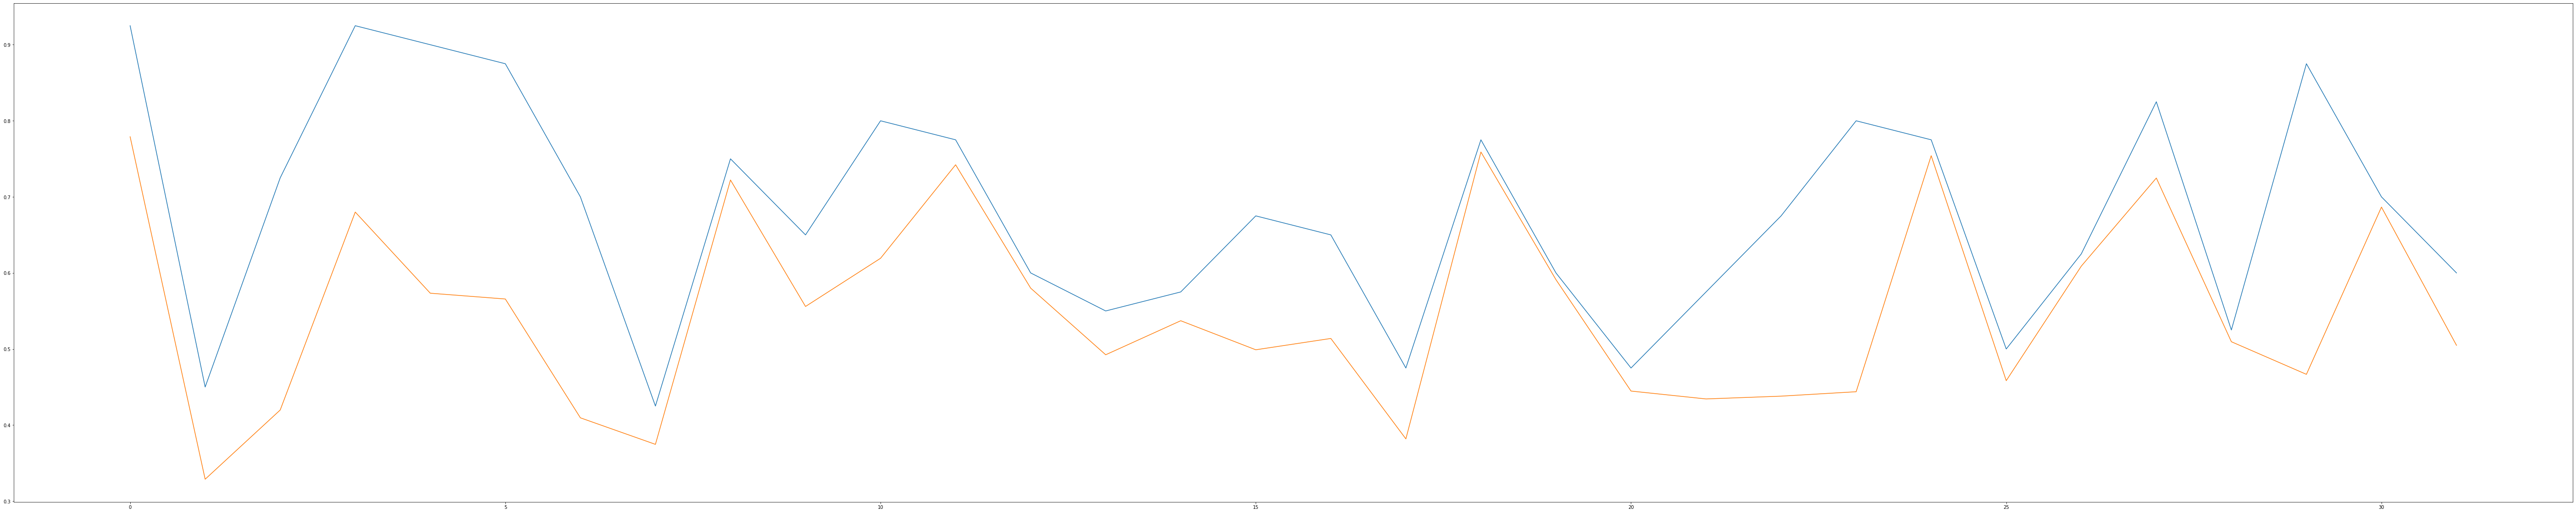

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (100, 20))
plt.plot(acc_data_sum.values)
plt.plot(f1_data_sum.values)

In [ ]:
# acc_data_sum.to_csv("acc_sum1.csv")
# f1_data_sum.to_csv("f1_sum1.csv")
# acc_data_neural.to_csv("acc_neural1.csv")
# f1_data_neural.to_csv("f1_neural1.csv")

In [36]:
import pandas as pd
emotion = ['valence', 'arousal', 'dominance', 'like']
f1_data_neural = pd.DataFrame(columns = features, index = emotion)
acc_data_neural = pd.DataFrame(columns = features, index = emotion)

In [ ]:
result_f1, result_acc = get_metrics(['DE'])
f1_data_neural['DE'] = result_f1
acc_data_neural['DE'] = result_acc
print(acc_data_neural)
print(f1_data_neural)
result_f1, result_acc = get_metrics(['DASM'])
f1_data_neural['DASM'] = result_f1
acc_data_neural['DASM'] = result_acc
print(acc_data_neural)
print(f1_data_neural)
result_f1, result_acc = get_metrics(['RASM'])
f1_data_neural['RASM'] = result_f1
acc_data_neural['RASM'] = result_acc
print(acc_data_neural)
print(f1_data_neural)
result_f1, result_acc = get_metrics(['DCAU'])
f1_data_neural['DCAU'] = result_f1
acc_data_neural['DCAU'] = result_acc
print(acc_data_neural)
print(f1_data_neural)

In [37]:
result_f1, result_acc, f1_n, acc_n = get_metrics(['DE', 'DASM', 'RASM', 'DCAU'])
f1_data_neural['ALL4'] = result_f1
acc_data_neural['ALL4'] = result_acc
print(acc_data_neural)
print(f1_data_neural)

0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

[[2 3]
 [2 1]]
[[0 0]
 [5 5]]
[[6]]
[[3 0]
 [2 5]]
[[3 0]
 [0 3]]
[[3 0]
 [0 3]]
[[2 0]
 [2 4]]
[[2 0]
 [2 4]]
[[4 1]
 [0 3]]
[[3 1]
 [0 2]]
[[3 1]
 [1 3]]
[[4 0]
 [0 4]]
[[3 0]
 [0 3]]
[[5]]
[[5]]
[[2 0]
 [2 4]]
[[4 2]
 [0 2]]
[[0 0]
 [4 4]]
[[3 1]
 [0 2]]
[[0 0]
 [4 4]]
[[4 1]
 [0 3]]
[[1 0]
 [2 3]]
[[0 0]
 [5 5]]
[[0 1]
 [5 4]]
[[2 0]
 [3 5]]
[[3 2]
 [1 2]]
[[3 0]
 [0 3]]
[[0 0]
 [4 4]]
[[0 0]
 [4 4]]
[[0 1]
 [0 3]]
[[3 4]
 [1 0]]
[[0 0]
 [4 4]]
1
[[3 2]
 [1 2]]
[[5 0]
 [0 5]]
[[0 0]
 [5 5]]
[[0 0]
 [5 5]]
[[0 0]
 [3 3]]
[[3 1]
 [0 2]]
[[2 1]
 [2 3]]
[[2 2]
 [2 2]]
[[3 3]
 [1 1]]
[[3 2]
 [0 1]]
[[4 0]
 [0 4]]
[[2 0]
 [2 4]]
[[2 0]
 [1 3]]
[[0 0]
 [4 4]]
[[0 0]
 [4 4]]
[[4 0]
 [0 4]]
[[4 0]
 [0 4]]
[[4 1]
 [0 3]]
[[1 1]
 [2 2]]
[[0 0]
 [4 4]]
[[1 1]
 [2 2]]
[[3 2]
 [0 1]]
[[2 2]
 [3 3]]
[[0 0]
 [5 5]]
[[2 1]
 [3 4]]
[[4 0]
 [0 4]]
[[3 0]
 [0 3]]
[[4 1]
 [0 3]]
[[0 0]
 [4 4]]
[[4]]
[[4 1]
 [0 3]]
[[2 1]
 [2 3]]
2
[[0 1]
 [4 3]]
[[2 0]
 [2 4]]
[[0 0]
 [5 5]]
[[0 1]
 [5 4]]
[[0 0]
 [3 3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

[[2 2]
 [3 3]]
[[0 1]
 [4 3]]
[[2 0]
 [1 3]]
[[0 1]
 [5 4]]
[[0 0]
 [4 4]]
[[4]]
[[0 0]
 [4 4]]
[[3 2]
 [1 2]]
[[0 0]
 [6 6]]
[[7]]
[[4 2]
 [2 4]]
[[0 0]
 [2 2]]
[[0 0]
 [4 4]]
[[0 0]
 [5 5]]
[[0 2]
 [0 3]]
[[0 0]
 [5 5]]
[[0 1]
 [0 4]]
[[0 1]
 [0 6]]
[[0 2]
 [4 2]]
[[5 5]
 [0 0]]
[[0 1]
 [6 5]]
[[0 3]
 [6 3]]
[[3 2]
 [0 1]]
[[2 1]
 [2 3]]
[[4 1]
 [0 3]]
[[5 1]
 [0 4]]
[[3 0]
 [0 3]]
[[2 1]
 [2 3]]
[[0 0]
 [5 5]]
[[4 2]
 [0 2]]
[[3 4]
 [1 0]]
[[2 2]
 [3 3]]
1
[[2 1]
 [3 4]]
[[2 2]
 [1 1]]
[[3 0]
 [0 3]]
[[0 1]
 [5 4]]
[[0 1]
 [4 3]]
[[4]]
[[4 1]
 [0 3]]
[[3 3]
 [0 0]]
[[0 0]
 [5 5]]
[[7]]
[[0 0]
 [6 6]]
[[2 1]
 [0 1]]
[[2 0]
 [2 4]]
[[5 0]
 [0 5]]
[[5]]
[[0 0]
 [5 5]]
[[0 0]
 [4 4]]
[[0 0]
 [6 6]]
[[0 1]
 [4 3]]
[[4 2]
 [0 2]]
[[6]]
[[0 1]
 [5 4]]
[[1 2]
 [2 1]]
[[3 0]
 [0 3]]
[[3 2]
 [1 2]]
[[3 1]
 [2 4]]
[[0 1]
 [3 2]]
[[2 1]
 [1 2]]
[[0 0]
 [5 5]]
[[4 4]
 [0 0]]
[[3 4]
 [1 0]]
[[0 2]
 [4 2]]
2
[[3 1]
 [2 4]]
[[0 0]
 [3 3]]
[[0 0]
 [3 3]]
[[0 0]
 [4 4]]
[[4]]
[[4]]
[[0 0]
 [3 3]]
[[3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


[[0 1]
 [6 5]]
[[4 3]
 [0 1]]
[[0 0]
 [5 5]]
[[3 1]
 [1 3]]
[[0 1]
 [4 3]]
[[2 0]
 [0 2]]
[[4 0]
 [0 4]]
[[0 0]
 [5 5]]
[[4 2]
 [0 2]]
[[0 1]
 [4 3]]
[[4 0]
 [0 4]]
[[4 1]
 [0 3]]
[[1 0]
 [2 3]]
[[4]]
[[6]]
[[0 0]
 [4 4]]
[[2 1]
 [0 1]]
[[0 0]
 [5 5]]
[[4 0]
 [0 4]]
[[5]]
[[2 1]
 [2 3]]
[[7]]
[[2 2]
 [2 2]]
[[8]]
[[0 1]
 [5 4]]
[[0 2]
 [5 3]]
[[3]]
[[3 0]
 [1 4]]
[[7]]
[[3 0]
 [0 3]]
[[2 3]
 [1 0]]
[[2 1]
 [3 4]]
1
[[3 1]
 [2 4]]
[[1 2]
 [2 1]]
[[5 2]
 [0 3]]
[[1 2]
 [3 2]]
[[0 0]
 [3 3]]
[[2 1]
 [0 1]]
[[0 0]
 [4 4]]
[[0 0]
 [5 5]]
[[3 2]
 [1 2]]
[[1 1]
 [3 3]]
[[4 1]
 [0 3]]
[[2 0]
 [2 4]]
[[2 3]
 [1 0]]
[[3]]
[[6]]
[[2 3]
 [2 1]]
[[2 0]
 [0 2]]
[[0 0]
 [5 5]]
[[2 0]
 [1 3]]
[[5]]
[[0 0]
 [4 4]]
[[7]]
[[0 1]
 [4 3]]
[[8]]
[[0 2]
 [5 3]]
[[5 1]
 [0 4]]
[[0 1]
 [0 2]]
[[2 2]
 [2 2]]
[[7]]
[[0 2]
 [3 1]]
[[3 0]
 [0 3]]
[[2 1]
 [3 4]]
2
[[2 0]
 [3 5]]
[[1 2]
 [2 1]]
[[0 0]
 [5 5]]
[[2 3]
 [1 0]]
[[2 1]
 [1 2]]
[[0 0]
 [2 2]]
[[0 0]
 [3 3]]
[[5 0]
 [0 5]]
[[2 0]
 [2 4]]
[[1 2]
 [3 2]]
[[2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


[[7]]
[[0 1]
 [5 4]]
[[0 0]
 [5 5]]
[[8]]
[[0 0]
 [7 7]]
[[5]]
[[0 0]
 [5 5]]
[[3 1]
 [1 3]]
[[3 1]
 [2 4]]
[[0 0]
 [6 6]]
[[3 0]
 [2 5]]
[[6 0]
 [0 6]]
[[1 2]
 [3 2]]
[[0 0]
 [5 5]]
[[5]]
[[5 0]
 [0 5]]
[[0 1]
 [5 4]]
[[0 1]
 [5 4]]
[[4 1]
 [0 3]]
[[3 2]
 [2 3]]
[[0 1]
 [4 3]]
[[0 1]
 [5 4]]
[[0 0]
 [6 6]]
[[0 0]
 [6 6]]
[[3 2]
 [2 3]]
[[2 4]
 [2 0]]
[[2 0]
 [2 4]]
[[2 0]
 [4 6]]
[[3 3]
 [1 1]]
[[6]]
[[2 0]
 [2 4]]
[[2 1]
 [3 4]]
1
[[7]]
[[0 0]
 [5 5]]
[[5 0]
 [0 5]]
[[8]]
[[7]]
[[5]]
[[0 0]
 [5 5]]
[[4 2]
 [0 2]]
[[1 0]
 [4 5]]
[[0 1]
 [5 4]]
[[5 0]
 [0 5]]
[[5 0]
 [0 5]]
[[1 2]
 [3 2]]
[[0 1]
 [5 4]]
[[0 0]
 [4 4]]
[[0 0]
 [5 5]]
[[0 0]
 [5 5]]
[[0 2]
 [5 3]]
[[1 0]
 [3 4]]
[[2 0]
 [2 4]]
[[0 0]
 [4 4]]
[[2 2]
 [3 3]]
[[0 1]
 [6 5]]
[[0 0]
 [6 6]]
[[3 2]
 [2 3]]
[[0 0]
 [4 4]]
[[4 2]
 [0 2]]
[[0 1]
 [6 5]]
[[2 0]
 [2 4]]
[[0 0]
 [5 5]]
[[3 0]
 [0 3]]
[[2 0]
 [3 5]]
2
[[7]]
[[0 0]
 [4 4]]
[[0 0]
 [5 5]]
[[0 0]
 [7 7]]
[[7]]
[[4]]
[[0 1]
 [5 4]]
[[3 3]
 [1 1]]
[[2 1]
 [3 4]]
[[3 3]
 [

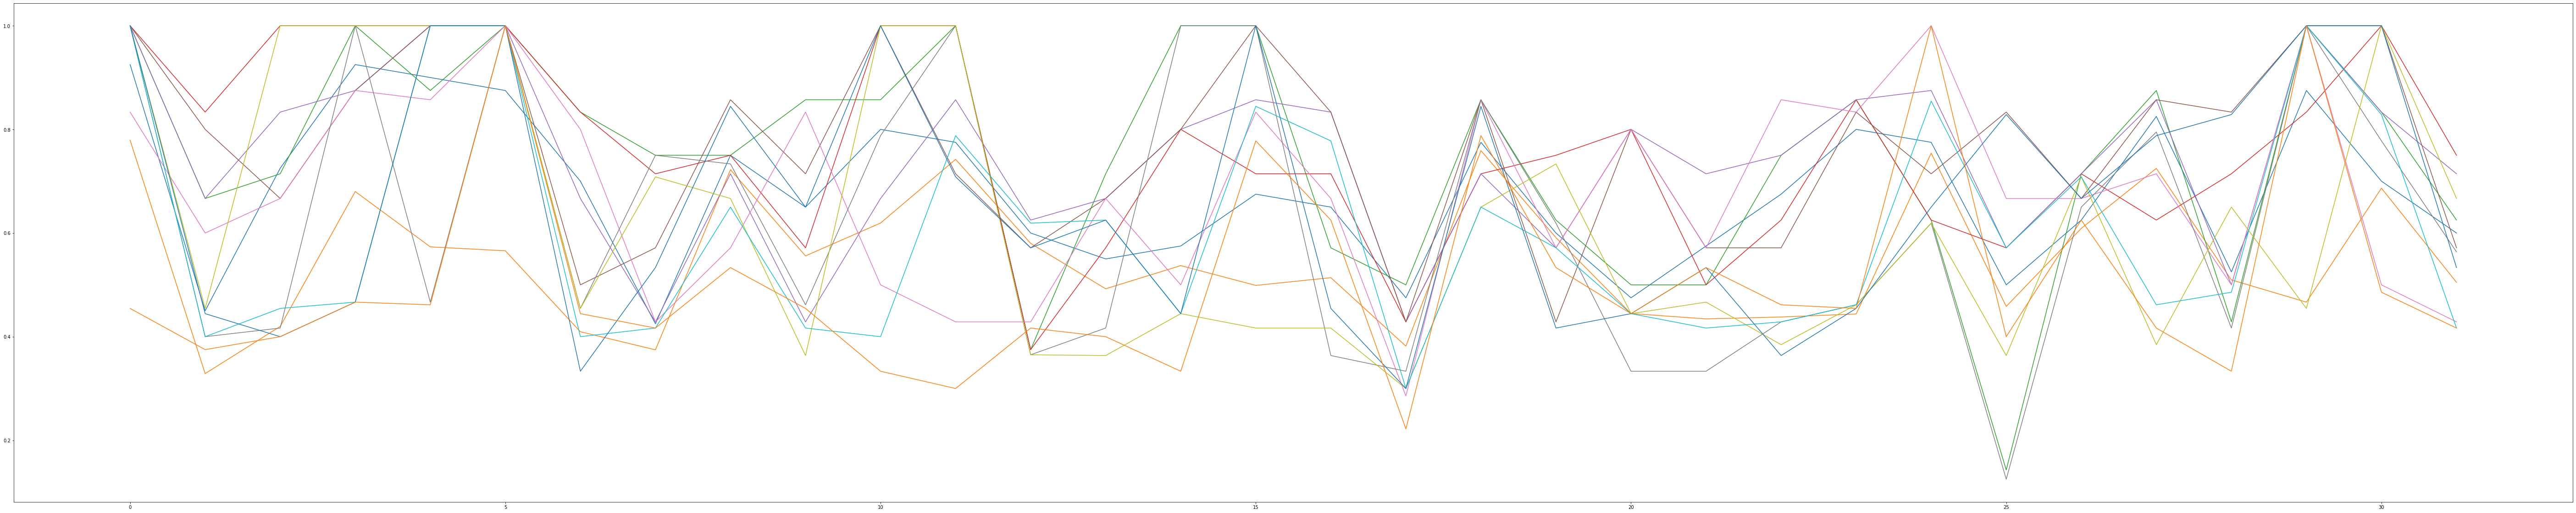

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (100, 20))
plt.plot(acc_data_sum.values)
plt.plot(f1_data_sum.values)
plt.plot(acc_n.values)
plt.plot(f1_n.values)

In [ ]:
result_f1, result_acc = get_metrics(['alpha/beta'])
f1_data_neural['alpha/beta'] = result_f1
acc_data_neural['alpha/beta'] = result_acc
print(acc_data_neural)
print(f1_data_neural)
result_f1, result_acc = get_metrics(['alpha/(beta + teta)'])
f1_data_neural['alpha/(beta + teta)'] = result_f1
acc_data_neural['alpha/(beta + teta)'] = result_acc
print(acc_data_neural)
print(f1_data_neural)

In [ ]:
#f1_data_neural.drop(columns = ['feature1', 'feature2'], inplace = True)
acc_data_neural.drop(columns = ['feature1', 'feature2'], inplace = True)

In [38]:
print(acc_data_neural)
print(f1_data_neural)

            DE DASM RASM DCAU alpha/beta alpha/(beta + teta)      ALL4
valence    NaN  NaN  NaN  NaN        NaN                 NaN  0.686510
arousal    NaN  NaN  NaN  NaN        NaN                 NaN  0.610149
dominance  NaN  NaN  NaN  NaN        NaN                 NaN  0.674167
like       NaN  NaN  NaN  NaN        NaN                 NaN  0.635417
            DE DASM RASM DCAU alpha/beta alpha/(beta + teta)      ALL4
valence    NaN  NaN  NaN  NaN        NaN                 NaN  0.630356
arousal    NaN  NaN  NaN  NaN        NaN                 NaN  0.522650
dominance  NaN  NaN  NaN  NaN        NaN                 NaN  0.625382
like       NaN  NaN  NaN  NaN        NaN                 NaN  0.567707
